# Random Forest Classifier

In [1]:
#practice

In [29]:
import finlab.ml as ml
dataset = ml.fundamental_features()
dataset = dataset.dropna(thresh=int(len(dataset)*0.5),axis=1).dropna(how = 'any')


In [30]:
feature_name = list(dataset.columns)

In [31]:
ml.add_profit_prediction(dataset)
#新增一個return欄位   前面使用feature_names 是因為要選取features來做測驗

In [32]:
data_arr =  dataset.index.get_level_values('date') < '2017'
dataset_train = dataset[data_arr]
dataset_text = dataset[~data_arr]

In [33]:
from sklearn.ensemble import RandomForestClassifier as RF

cf = RF(n_estimators=100)

cf.fit(dataset_train[feature_name],dataset_train['return'] >1)

cf.score(dataset_text[feature_name],dataset_text['return'] >1)


0.5428044705611246

In [34]:
prediction = cf.predict(dataset_test[feature_name])

In [35]:
import matplotlib
returns = dataset_text['return'][prediction]
dates = returns.index.get_level_values('date')
returns.groupby(dates).mean().cumprod().plot(color = 'red')

returns = dataset_text['return'][~prediction]
dates = returns.index.get_level_values('date')
returns.groupby(dates).mean().cumprod().plot(color = 'blue')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 8679 but corresponding boolean dimension is 7654

In [ ]:

pd.Series(cf.feature_importances_,index = feature_name).sort_values(ascending = False)

In [ ]:
#Practice

## Get dataset

In [36]:
from finlab.ml import fundamental_features
dataset = fundamental_features()
dataset = dataset.dropna(thresh=int(len(dataset)*0.5), axis=1).dropna(how='any')

## Add labels

In [37]:
features = dataset.columns

import finlab.ml as ml

ml.add_profit_prediction(dataset)
dataset = dataset.dropna()
dataset.head()

R101_ROA稅後息前  R11V_ROA綜合損益  R103_ROE稅後  R11U_ROE綜合損益  \
stock_id date                                                               
1101     2014-05-15  2.791232e+06      1.630076    1.789978      2.971092   
         2014-08-14  8.379538e+06      0.152556    5.481276      0.282596   
         2014-11-14  1.477153e+07      2.168353    9.817990      4.058708   
         2015-03-31  1.996292e+07      3.002608   12.657647      5.476992   
         2015-05-15  9.745154e+05      0.069454    0.601114      0.124782   

                     R145_稅前息前折舊前淨利率  R105_營業毛利率  R106_營業利益率  R107_稅前淨利率  \
stock_id date                                                              
1101     2014-05-15        21.368815   18.206665   13.790211   13.290971   
         2014-08-14        42.801859   22.404973   18.630915   30.862803   
         2014-11-14        71.162010   22.175860   18.422237   52.943977   
         2015-03-31        95.660637   20.894608   15.825841   71.517830   
         2015-05-15        17.520262   13.344165    7.898772    6.855678   

                     R108_稅後淨利率  R112_業外收支營收率  ...   R501_流動比率   R502_速動比率  \
stock_id date                                  ...                           
1101     2014-05-15   10.447714     -0.499240  ...  123.837828  109.510229   
         2014-08-14   15.149579      1.091441  ...  109.819505   97.360139   
         2014-11-14   16.396389      1.835055  ...  113.370853  100.450140   
         2015-03-31   13.594134      1.937474  ...  140.759054  125.502509   
         2015-05-15    4.545296     -1.043095  ...  132.899231  118.561600   

                     R503_利息支出率   R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  \
stock_id date                                                           
1101     2014-05-15   -9.792979  17732671.0      0.023981    0.550675   
         2014-08-14   55.169680   7972516.0      0.028432    0.622629   
         2014-11-14    6.631518  10552354.0      0.026593    0.581786   
         2015-03-31    3.898742  27973772.0      0.025961    0.565798   
         2015-05-15   -7.153186  22891238.0      0.018713    0.455819   

                     R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量    return  
stock_id date                                                           
1101     2014-05-15    -81394854.0     0.044805    3869612.0  1.073347  
         2014-08-14    -74379365.0     0.052721   -3002140.0  0.984816  
         2014-11-14    -76877637.0     0.049112   10205052.0  0.969163  
         2015-03-31    -78804395.0     0.047718   24426590.0  0.956818  
         2015-05-15    -89211708.0     0.034296   -3122357.0  0.850077  

[5 rows x 42 columns]

## Split Train Test dataset

In [38]:
select = dataset.index.get_level_values('date') < '2017'
dataset_train = dataset[select]
dataset_test = dataset[~select]

## Training

In [39]:
from sklearn.ensemble import RandomForestClassifier

cf = RandomForestClassifier(200)
cf.fit(dataset_train[features], dataset_train['return'] > 1)
cf.score(dataset_test[features], dataset_test['return'] > 1)

0.56101384896786

### xgboot

In [ ]:
import xgboost

cf_xgb = xgboost.XGBClassifier()

cf_xgb.fit(dataset_train[features], dataset_train['return'] > 1)
cf_xgb.score(dataset_test[features], dataset_test['return'] > 1)

### lightgbm

In [42]:
import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(*train, **fit_params)


NameError: name 'test' is not defined

In [ ]:
gs.fit()

In [41]:
import lightgbm

cf_lgb = lightgbm.LGBMClassifier()

cf_lgb.fit(dataset_train[features], dataset_train['return'] > 1)
cf_lgb.score(dataset_test[features], dataset_test['return'] > 1)

0.5582701855239091

## Prediction

In [26]:
import pandas as pd
prediction = cf_lgb.predict(dataset_test[features])

## Backtest

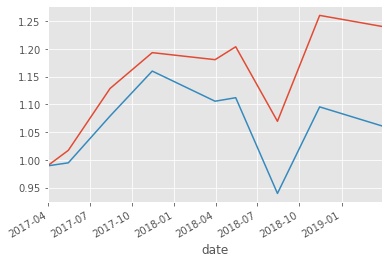

In [27]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

returns1 = dataset_test['return'][prediction == True]
dates = returns1.index.get_level_values('date')
returns1.groupby(dates).mean().cumprod().plot()

returns2 = dataset_test['return'][prediction == False]
dates = returns2.index.get_level_values('date')
returns2.groupby(dates).mean().cumprod().plot()

## Feature Importance

In [ ]:
importance = pd.Series(cf.feature_importances_, index=features).sort_values(ascending=False)
importance

## New Strategy using feature importance

In [ ]:
from finlab.data import Data
data = Data()
close = data.get('收盤價')
sma = close.rolling(60, min_periods=10).mean()
bias = close / sma

ml.add_feature(dataset, 'bias', bias)
dataset.head()

In [ ]:
items = list(importance.index[:20])

def select(df):
    rank = df[items].rank(pct=True).sum(axis=1)
    return df[rank > rank.quantile(0.9)]['return'][df['bias'] > 1].mean()

dates = dataset.index.get_level_values('date')
dataset.groupby(dates).apply(select).cumprod().plot()
dataset['return'].groupby(dates).mean().cumprod().plot()